This is a backup for a notebook that I made for SoccerTrack on Kaggle.

[![](https://img.shields.io/badge/Kaggle-20BEFF?style=for-the-badge&logo=Kaggle&logoColor=white)](https://www.kaggle.com/code/atomscott/soccertrack-dataset-demo)

# SoccerTrack Dataset Demo with SportsLabKit

[SportsLabKit](https://github.com/AtomScott/SportsLabKit) is a Python library designed to simplify the process of tracking multiple objects in sports videos. It provides a modular and flexible architecture that allows you to customize your tracking pipeline according to your needs. In this notebook, we'll demonstrate how to use SportsLabKit to track players in a soccer match using the SoccerTrack dataset.

<a href='https://github.com/AtomScott/SportsLabKit'>
<img src="https://repository-images.githubusercontent.com/433316752/1a54dc7b-1cc5-4d7b-911c-a9ac266cf6c7" alt="Social Graph" style="width: 400px; object-fit: cover; border-radius: 10px;"></a>

## Installation

Before we start, we need to install SportsLabKit and [TorchReID](https://github.com/KaiyangZhou/deep-person-reid) for image embeddings. Run the following commands to install these libraries:

In [ ]:
%pip install sportslabkit --quiet
%pip install git+https://github.com/KaiyangZhou/deep-person-reid.git --quiet

Now we should be able to import SportsLabKit! 

In [ ]:
import sportslabkit as slk

## Loading the Dataset

We'll use the SoccerTrack dataset on Kaggle. Let's load it.

In [ ]:
from pathlib import Path

dataset_root = Path('/kaggle/input/soccertrack')
print(list(dataset_root.iterdir()))

For this demo, we'll use the Wide View video dataset:

In [ ]:
path_to_csv = dataset_root / 'wide_view/annotations/F_20200220_1_0000_0030.csv'
path_to_mp4 = dataset_root / 'kaggle/input/soccertrack/wide_view/videos/F_20200220_1_0000_0030.mp4'
path_to_kps = dataset_root / 'kaggle/input/soccertrack/fisheye_keypoints.json'

## Loading the Annotation Data

Let's load the annotation data:

In [ ]:
bbdf = slk.load_df(path_to_csv)
bbdf.head()

## Loading the Video Data

Next, we load the video data:

In [ ]:
cam = slk.Camera(path_to_mp4)  # Camera object will be used to load frames
frame = cam[0] # When indexed like this cam will return a numpy array
slk.utils.cv2pil(frame, convert_bgr2rgb=False) # Utility function in SportsLabKit to show images


## Visualizing Frame Data

Let's visualize the frame data:

In [ ]:
frame_idx = 1 # Note the bbdf starts index with 1 not 0
vis_frame = bbdf.visualize_frame(frame_idx=frame_idx, frame=frame)
slk.utils.cv2pil(frame, convert_bgr2rgb=False)

## Using Pitch Coordinate Data

Next, we'll use the pitch coordinate data:

In [ ]:
cam.source_keypoints, cam.target_keypoints = slk.utils.load_keypoints(path_to_kps)
codf = bbdf.to_codf(cam.H, method='bottom_middle')
codf.head()

## Visualizing Frame Data

Let's visualize the frame data in pitch coordinates. We don't have to use pass the frame as we will be plotting on to a pitch.

In [ ]:
codf.visualize_frame(frame_idx=frame_idx, ball_key='BALL')

## Tracking

For tracking, it's recommended to turn on GPU use:

In [ ]:
from sportslabkit.mot import SORTTracker

det_model = slk.detection_model.load('YOLOv8x', imgsz=640)
motion_model = slk.motion_model.load('KalmanFilter', dt=1/30, process_noise=10000, measurement_noise=10)

tracker = SORTTracker(detection_model=det_model, motion_model=motion_model)
res = tracker.track(cam)

Thanks for checking our this notebook!

I have more guides about how to use the sportslabkit on perform tracking in the [official docs](https://sportslabkit.readthedocs.io/en/latest/)!

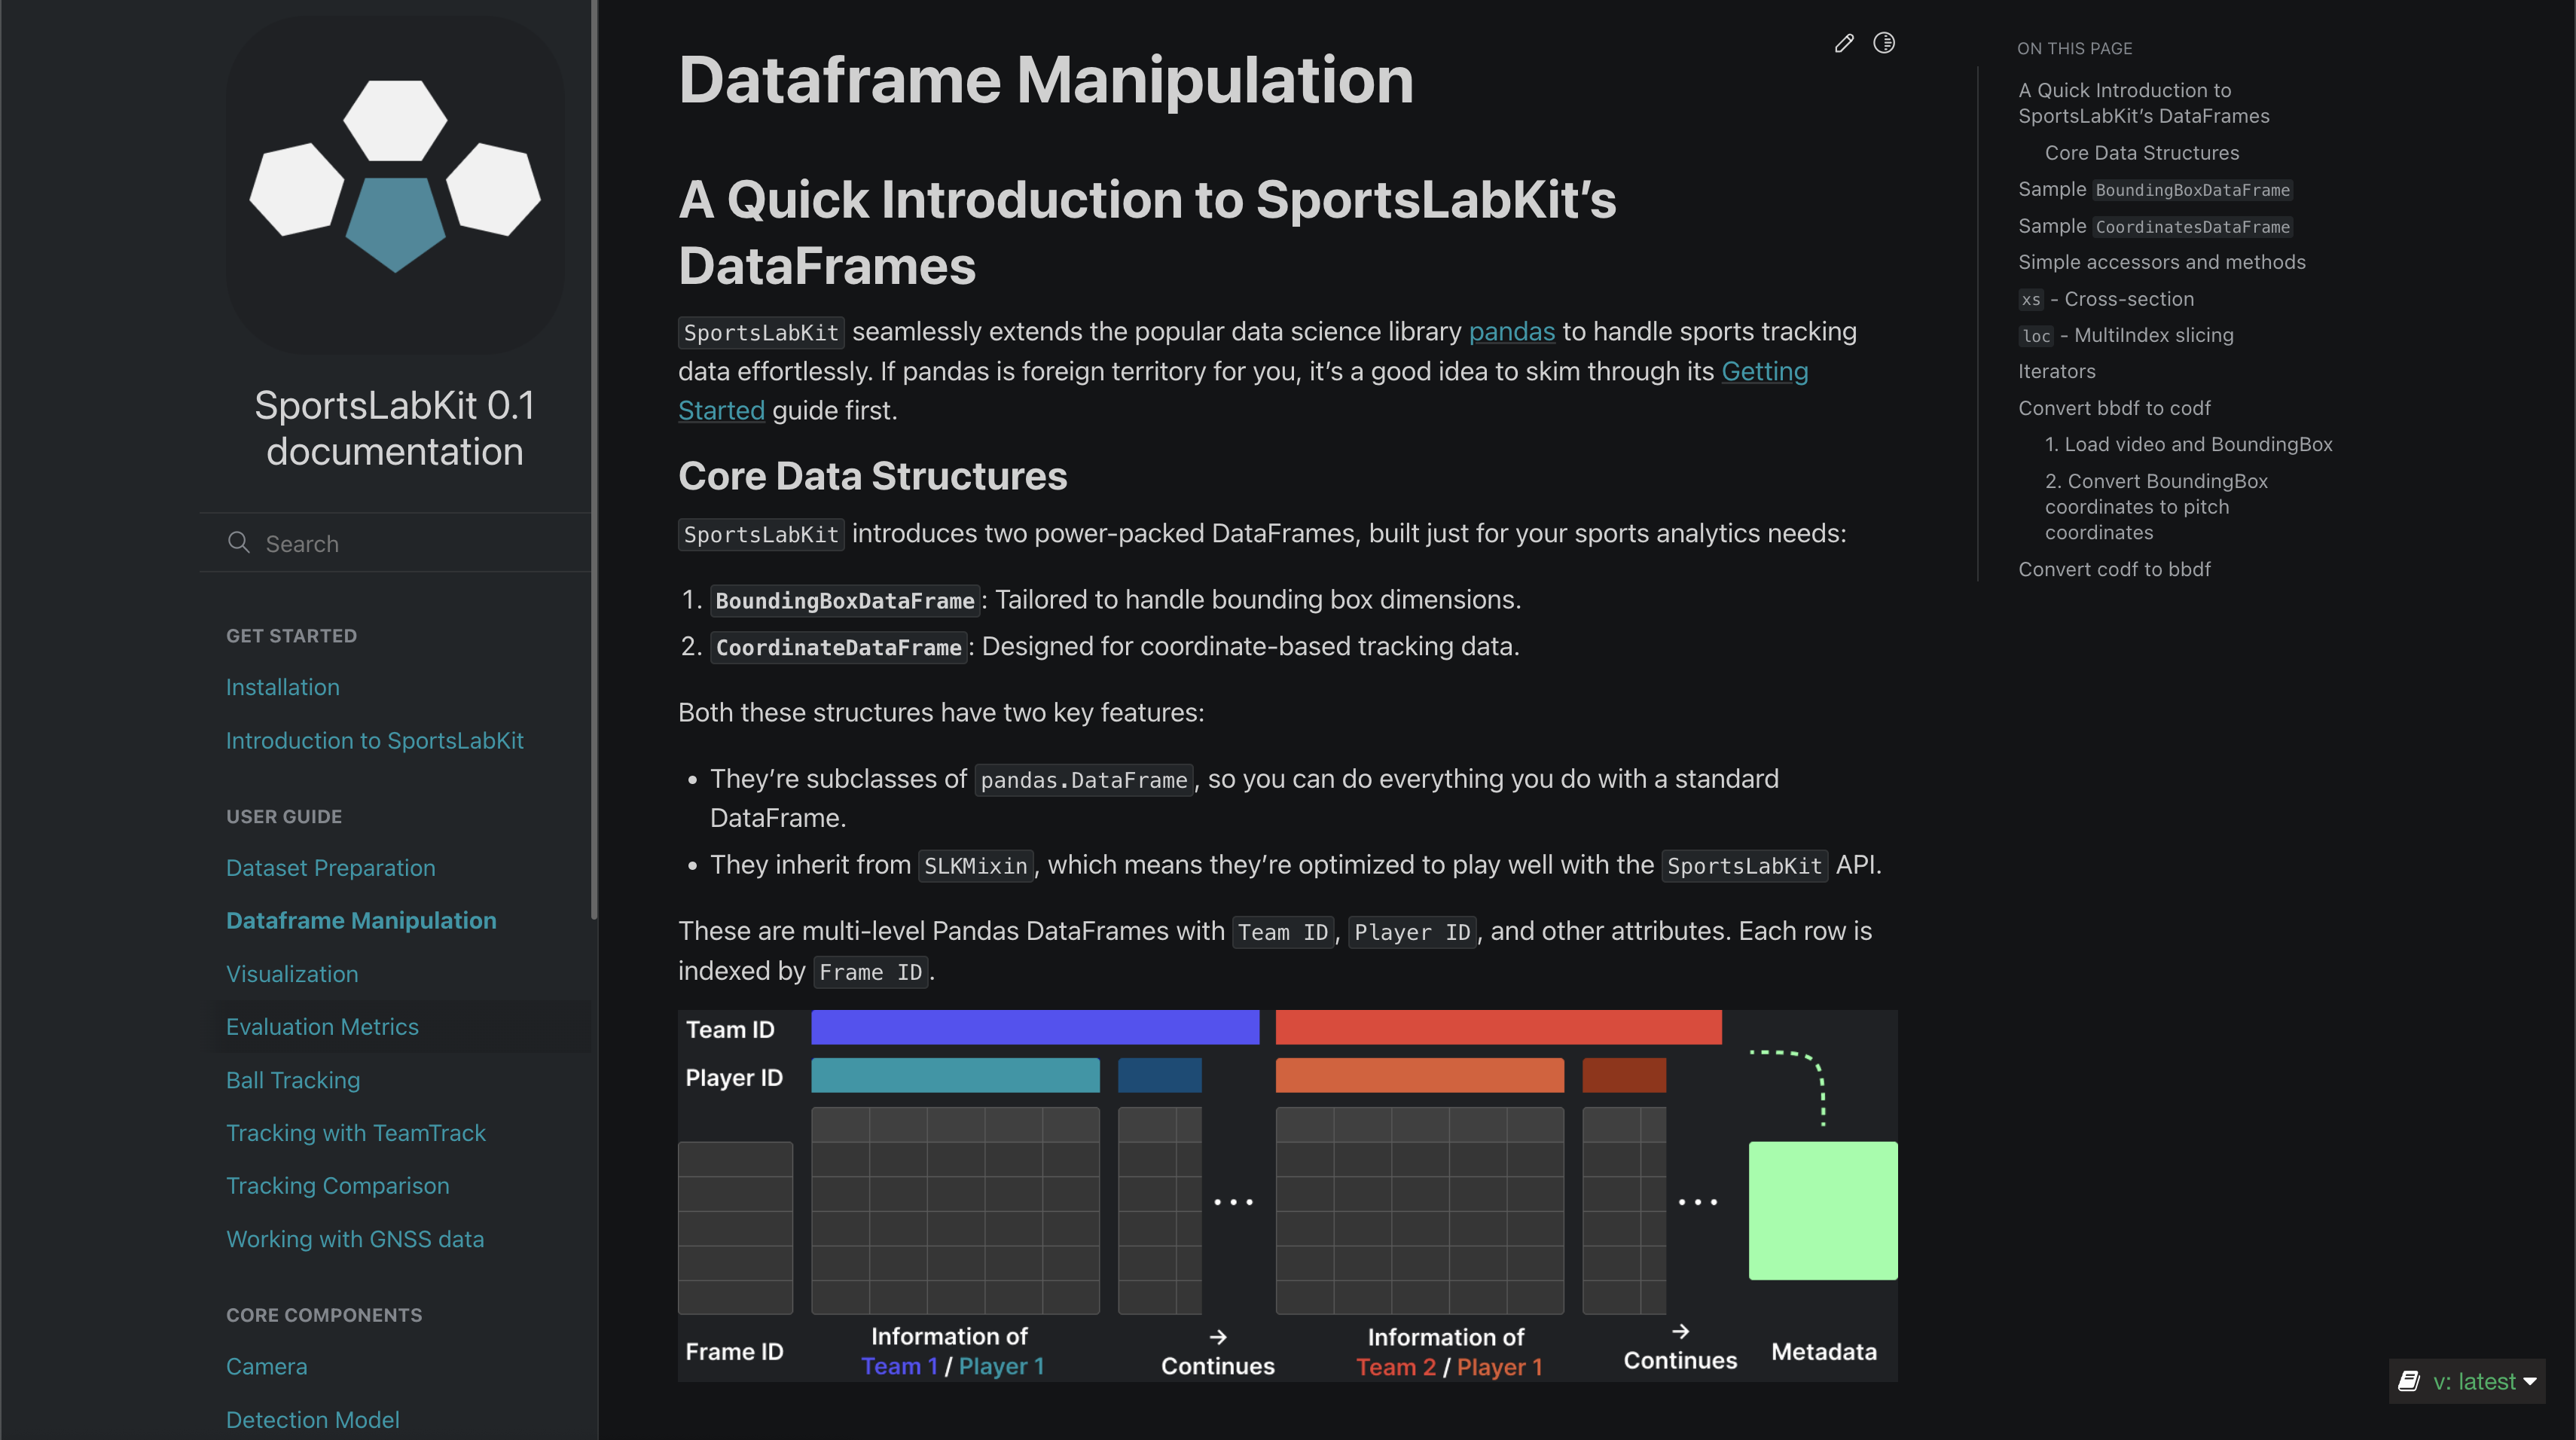

Happy hacking!